In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline

In [ ]:
X,y = make_blobs(n_samples = 1000,centers = 3,n_features=2) ##y is just for initial visualization clustering is done only on independent feature that is X

In [17]:
X,X.shape

(array([[ 4.41488069, -9.72221835],
        [ 1.09532072, -3.30441645],
        [ 6.01954387, -7.82856858],
        ...,
        [ 7.00443712, -9.450596  ],
        [ 6.8960296 , -7.98411544],
        [ 1.54456789, -5.11127625]]),
 (1000, 2))

In [18]:
y,y.shape

(array([0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1,
        0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2,
        1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0,
        1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0,
        2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1,
        0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1,
        0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
        1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1,
        2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
        1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2,
        1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2,
        1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 

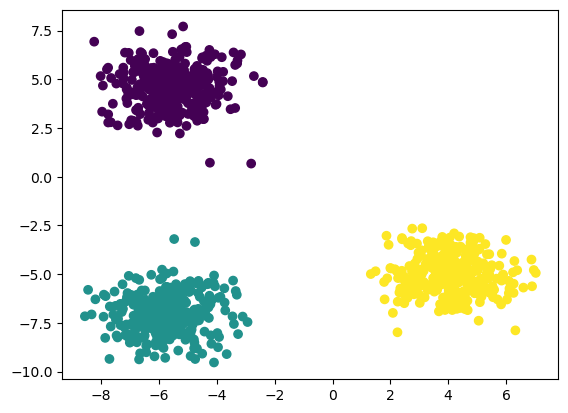

In [29]:
plt.scatter(X[:,0],X[:,1],c=y)

In [30]:
## standardization feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33,random_state= 42) ##y just for representation, X will be used for clustering

In [32]:
X_train_scaled = scaler.fit_transform(X_train)

In [33]:
X_test_scaled= scaler.transform(X_test)

In [34]:
from sklearn.cluster import KMeans


In [ ]:
## Elbow method to select K value

wcss = []

for k in range(1,11): ##Iterate K between 1 and 11
    kmeans = KMeans(n_clusters= k, init = 'k-means++' ) 
    kmeans.fit(X_train_scaled) ##fitting for independent feature 
    wcss.append(kmeans.inertia_)

c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [ ]:
wcss ##wcss decreases with increase in K value

[1340.0,
 543.4114850906219,
 55.17489383774105,
 48.06071509932766,
 41.59293545043087,
 35.20419743643553,
 31.044461979087835,
 27.242466605854347,
 23.997819200693918,
 22.213877063465976]

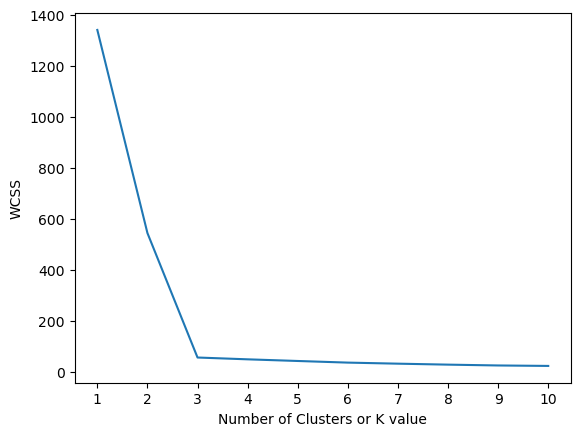

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters or K value')
plt.ylabel('WCSS')
plt.show()
##we can see based on curve that after 3 WCSS stabilizes

In [43]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++' ) 
kmeans.fit_predict(X_train_scaled)

c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0,
       1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0,

In [45]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1,
       2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1,
       2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2,

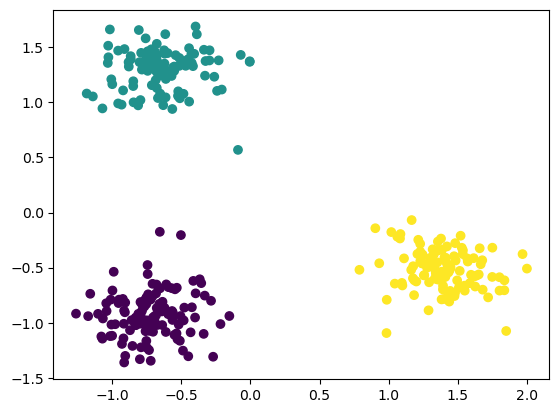

In [ ]:
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=y_pred) 

## Validating the K value
### kneelocator

In [48]:
!pip install kneed

In [49]:
from kneed import KneeLocator
kl= KneeLocator(range(1,11),wcss,curve = 'convex',direction = 'decreasing')

In [ ]:
kl.elbow ##similar to elbow method but without having to look at plot

3

### Silhouette scoring

In [52]:
from sklearn.metrics import silhouette_score

silhoutte_coefficients = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    kmeans.fit(X_train_scaled)
    score= silhouette_score(X_train_scaled,kmeans.labels_)
    silhoutte_coefficients.append(score)

c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

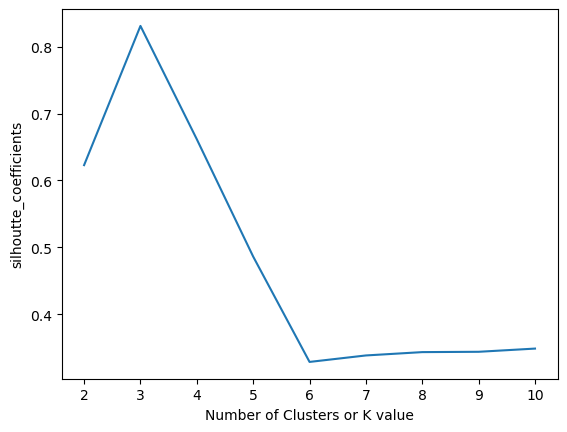

In [ ]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xlabel('Number of Clusters or K value')
plt.ylabel('silhoutte_coefficients')
plt.show()
## we can see silhoutte score is highest for K=3